# 2021 KoSAIM Hands-On

# Hands-On에 들어가기에 앞서

### AI, ML, DL이 무엇인가?


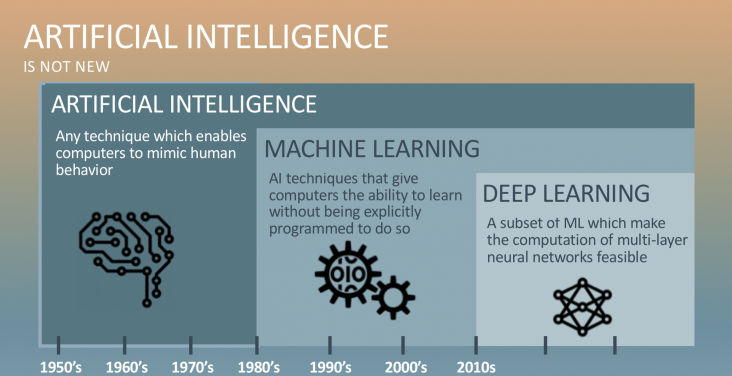

https://www.designnews.com/electronics-test/4-reasons-use-artificial-intelligence-your-next-embedded-design

### 기존의 ML과 현재 많이 사용하는 DL의 차이점

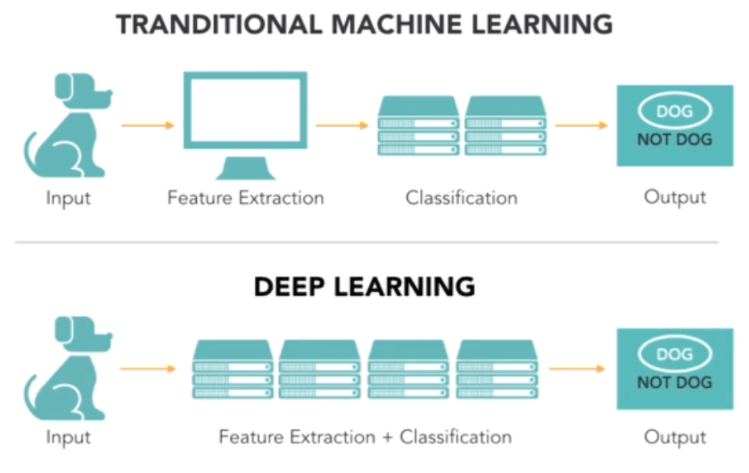

https://bigdatapath.wordpress.com/2019/09/13/ai-vs-machine-learning-vs-deep-learning-whats-the-difference/

### DL의 개념도 예시



![alt text](https://adeshpande3.github.io/assets/Cover.png)

https://arxiv.org/ftp/arxiv/papers/1910/1910.13796.pdf

### DL에서의 Convolution이란?

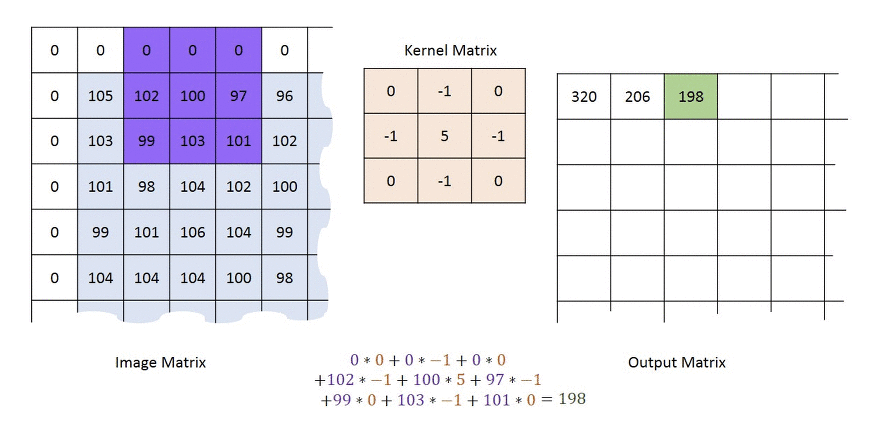

https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean/296701

### 파이썬 기초 공부를 위한 추천 URL

https://wikidocs.net/2




---



# Hands-On 시작

# [0] Colab GPU setting... 

Menu -> Runtime -> Change runtime type 

![gpu setting](https://raw.githubusercontent.com/mi2rl/datasets/master/gpu.png)


In [1]:
#check GPU is well mounted
!nvidia-smi

Fri Aug 20 09:26:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!rm -rf *

# [1] 데이터 준비: MedNIST dataset


## 1.1. 데이터 다운로드

In [3]:
!pwd # 현재 경로 확인

/content


In [4]:
!ls # 현재 경로 내용 확인

In [5]:
# 데이터 다운로드
!wget https://raw.githubusercontent.com/mi2rl/datasets/master/AMC_chestxray_PGGAN.zip

--2021-08-20 09:26:22--  https://raw.githubusercontent.com/mi2rl/datasets/master/AMC_chestxray_PGGAN.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92629342 (88M) [application/zip]
Saving to: ‘AMC_chestxray_PGGAN.zip’

AMC_chestxray_PGGAN 100%[===================>]  88.34M   171MB/s    in 0.5s    

2021-08-20 09:26:29 (171 MB/s) - ‘AMC_chestxray_PGGAN.zip’ saved [92629342/92629342]



In [6]:
!ls

AMC_chestxray_PGGAN.zip


In [7]:
# 압축 풀기
!unzip AMC_chestxray_PGGAN.zip

Archive:  AMC_chestxray_PGGAN.zip
   creating: AMC_chestxray_PGGAN/
   creating: AMC_chestxray_PGGAN/interstitialOpacity/
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000050.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000195.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000530.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000555.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000666.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000789.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000826.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000909.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img001043.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img001076.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img001078.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img001181.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpaci

In [8]:
!ls

AMC_chestxray_PGGAN  AMC_chestxray_PGGAN.zip


In [9]:
!ls AMC_chestxray_PGGAN  

interstitialOpacity  nodule  normal


In [10]:
#nodule 데이터는 본 hands-on에 사용하지 않을 것이므로 삭제
!rm -rf AMC_chestxray_PGGAN/nodule

In [11]:
!ls AMC_chestxray_PGGAN

interstitialOpacity  normal


## 1.2. 데이터 출처

**CNN을 이용한 이미지 생성기(모델 PGGAN)를 학습해, 합성 이미지 생성(본 Hands-On에 사용된 모든 데이터는 합성 이미지임)**

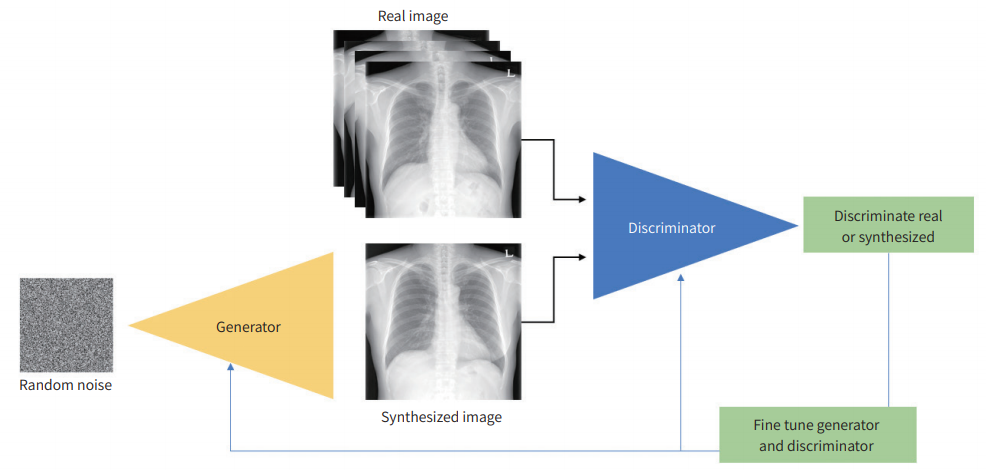

https://jksronline.org/pdf/10.3348/jksr.2020.0158

## 1.2. 데이터 파악

1. /interstitialOpacity
2. /normal


In [12]:
# 패키지 불러오기
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
dataDir = 'AMC_chestxray_PGGAN' # 데이터 위치
classNames = os.listdir(dataDir) # 각 클래스의 이름들
numClass = len(classNames)               # 클래스 개수

print('Class names: ', classNames)
print('number of classes', numClass)

for tmp in range(len(classNames)):
  NImage=len(os.listdir(os.path.join(dataDir, classNames[tmp])))
  print('Class ', classNames[tmp], 'has ', NImage, ' of images.')

Class names:  ['interstitialOpacity', 'normal']
number of classes 2
Class  interstitialOpacity has  1000  of images.
Class  normal has  1000  of images.


In [14]:
os.listdir(os.path.join(dataDir, 'interstitialOpacity'))[:10]# 파일명 몇개 확인해보기

['img037268.png',
 'img021790.png',
 'img015360.png',
 'img034334.png',
 'img041557.png',
 'img097406.png',
 'img082677.png',
 'img040123.png',
 'img092966.png',
 'img059258.png']

normal data description
num of images 1000
sample image size (224, 224)
sample filename img000994.png


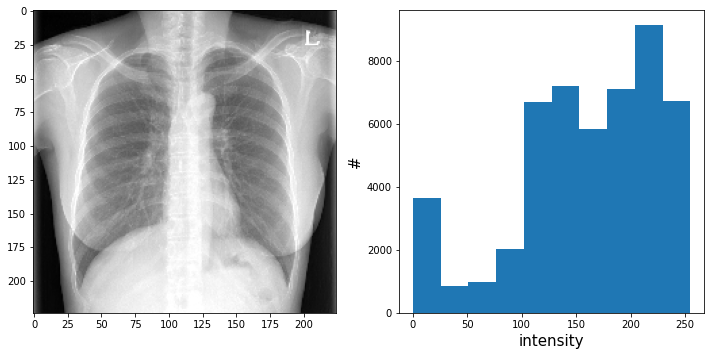

In [15]:
#normal
normal_list=os.listdir(os.path.join(dataDir, 'normal'))
inum = np.random.randint(len(normal_list))
sampleImage=cv2.imread(os.path.join(dataDir, 'normal', normal_list[inum]), 0)

print('normal data description')
print('num of images', len(normal_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', normal_list[inum])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

Interstitial Opacity data description
num of images 1000
sample image size (224, 224)
sample filename img043548.png


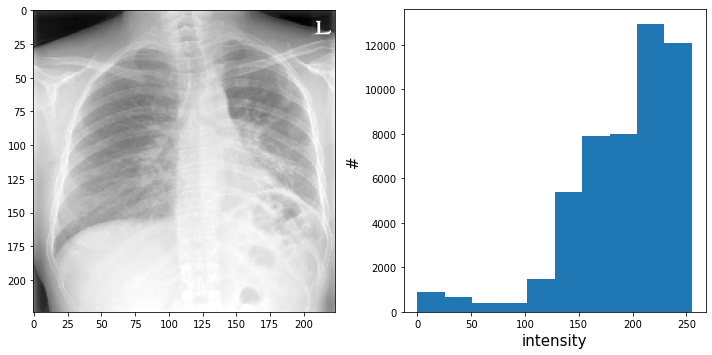

In [16]:
#Interstitial Opacity 이미지와 픽셀값 분포 그려보기
interstitialOpacity_list=os.listdir(os.path.join(dataDir, 'interstitialOpacity'))
inum = np.random.randint(len(interstitialOpacity_list))
sampleImage=cv2.imread(os.path.join(dataDir, 'interstitialOpacity', interstitialOpacity_list[inum]), 0)

print('Interstitial Opacity data description')
print('num of images', len(interstitialOpacity_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', interstitialOpacity_list[inum])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

# [2] VGG16를 이용한 분류 실습



![VGG16 네트워크 구조](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)

### [Quiz] VGG16에서 16은 16 layer를 뜻하는데, 위에 network architecture에서 16 layer 찾아보세요.

In [17]:
# 패키지 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model

## 2.1. [Quiz] 순서가 섞인 layer들을 VGG16 구성에 맞게 배치해보세요.

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [20]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [21]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [22]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [23]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [24]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000, activation="sigmoid")) 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 256)     147712    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 256)     590080    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 256)     590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 256)       0

## 2.2. VGG 모델 불러오기(위에 만든 것과 비교해보기)

In [26]:
# 패키지 불러오기
# 패키지 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model

In [27]:
from tensorflow.keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

553476096/553467096 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

## 2.3. keras 에서 제공되는 모델들 참고: https://keras.io/applications/

## 2.4. VGG 모델로 Chest X-ray dataset 학습하기

### 2.4.1. Dataset 나누기
* Train / Validation / Test

In [28]:
import shutil
try:
  shutil.rmtree('dataset')
except:
  pass

In [29]:
print(classNames)

['interstitialOpacity', 'normal']


In [30]:
import tqdm
import random

trainFrac = 0.7
validFrac = 0.1   # Define the fraction of images to move to validation dataset
testFrac = 0.2    # Define the fraction of images to move to test dataset

for tmp in tqdm.tqdm(range(len(classNames))):

  os.makedirs(os.path.join('dataset/train', classNames[tmp]))
  os.makedirs(os.path.join('dataset/valid', classNames[tmp]))
  os.makedirs(os.path.join('dataset/test', classNames[tmp]))

  filelist_tmp=os.listdir(os.path.join(dataDir, classNames[tmp]))
  random.shuffle(filelist_tmp)
  train_N=int(len(filelist_tmp)*trainFrac)
  valid_N=int(len(filelist_tmp)*validFrac)
  test_N=len(filelist_tmp)-train_N-valid_N

  trainList_tmp=filelist_tmp[:train_N]
  validList_tmp=filelist_tmp[train_N:train_N+valid_N]
  testList_tmp=filelist_tmp[train_N+valid_N:]

  for tmp2 in range(len(trainList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], trainList_tmp[tmp2]), os.path.join('dataset/train', classNames[tmp]))

  for tmp2 in range(len(validList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], validList_tmp[tmp2]), os.path.join('dataset/valid', classNames[tmp]))

  for tmp2 in range(len(testList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], testList_tmp[tmp2]), os.path.join('dataset/test', classNames[tmp]))

  print('')
  print('Class: ', classNames[tmp])
  print('num of train set: ', len(trainList_tmp))
  print('num of valid set: ', len(validList_tmp))
  print('num of test set: ', len(testList_tmp))

 50%|█████     | 1/2 [00:00<00:00,  6.19it/s]


Class:  interstitialOpacity
num of train set:  700
num of valid set:  100
num of test set:  200


100%|██████████| 2/2 [00:00<00:00,  4.64it/s]


Class:  normal
num of train set:  700
num of valid set:  100
num of test set:  200


### 2.4.2. Image Data Generator 정의

###### Keras API - ImageDataGenerator: 일정한 규칙으로 만들어진 폴더구조에서 데이터셋을 자동으로 불러와 학습에 사용할 수 있게 도와주는 API

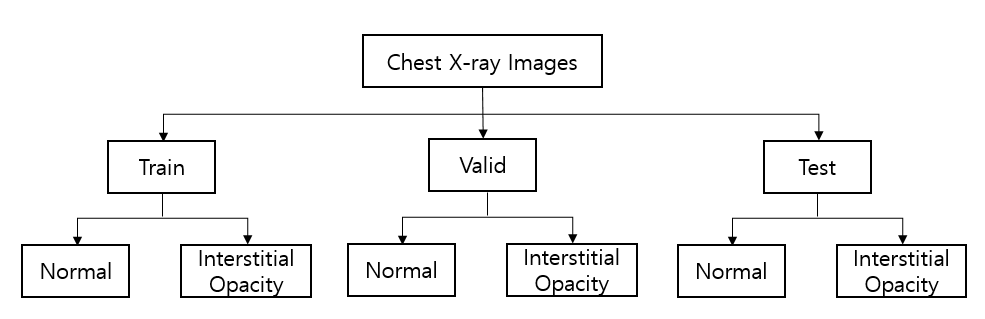

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './dataset/train'
valid_dir = './dataset/valid'
test_dir = './dataset/test'
image_size = 128
batch_size = 32

# 학습에 사용될 이미지 데이터 생성기
# train_datagen = ImageDataGenerator(rescale=1/255)

train_datagen = ImageDataGenerator(
                  rescale=1/255,
                  rotation_range=3,
                  width_shift_range=0.01,
                  height_shift_range=0.10,
                  zoom_range=0.05,
                  fill_mode='nearest')
 
# 검증에 사용될 이미지 데이터 생성기
valid_datagen = ImageDataGenerator(rescale=1/255)

# 테스트에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator(rescale=1/255)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


### 이미지 증강이란?

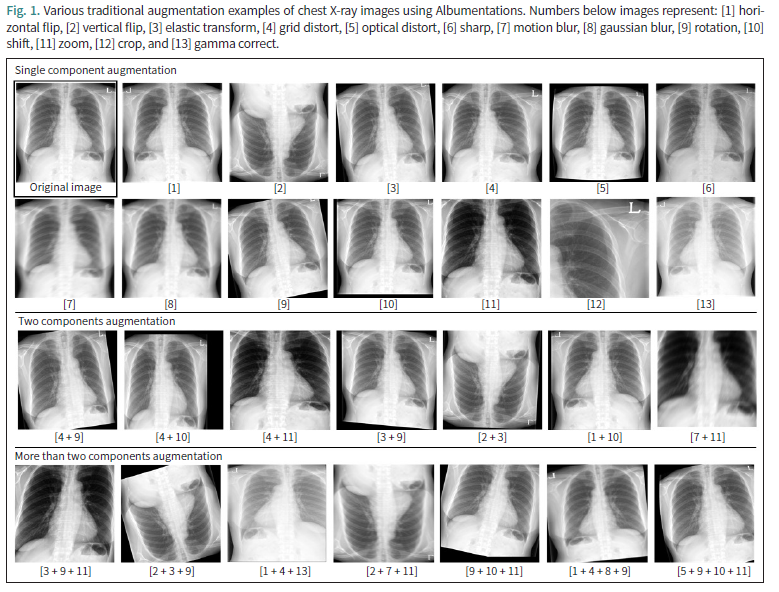

https://jksronline.org/pdf/10.3348/jksr.2020.0158

### 2.4.3. VGG 모델을 이용하여 학습하기

In [36]:
# 패키지 불러오기
# 패키지 불러오기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout


from tensorflow.keras.applications.vgg16 import VGG16

K.clear_session() # 새로운 세션으로 시작

In [37]:
# 모델 불러오기
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

In [38]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가(이진분류 문제로 바꿔줌)
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

In [39]:
# 새로운 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [40]:
!pip install livelossplot

In [42]:
from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

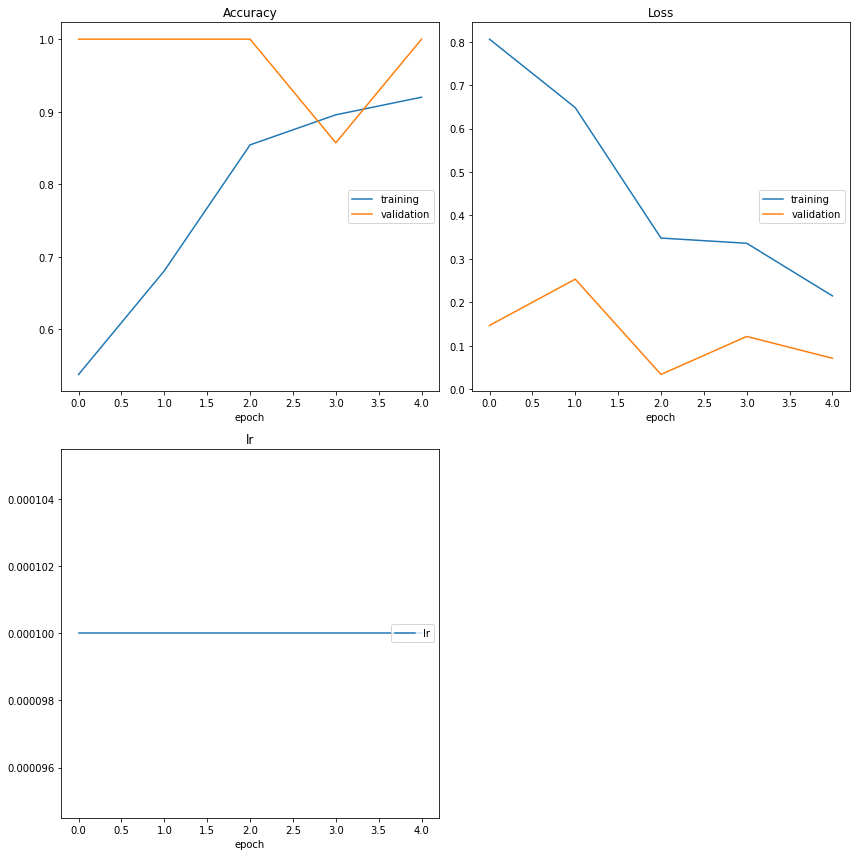

Accuracy
	training         	 (min:    0.538, max:    0.920, cur:    0.920)
	validation       	 (min:    0.857, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.215, max:    0.806, cur:    0.215)
	validation       	 (min:    0.034, max:    0.253, cur:    0.071)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f9750485b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 6/30
11/43 [======>.......................] - ETA: 9s - loss: 0.1489 - acc: 0.9574

KeyboardInterrupt: ignored

In [43]:

datapath='./output'
FOLDER = 'study1'

epochs=30
save_period=5 #epoch

steps_per_epoch=(train_N*numClass)/batch_size
validation_steps=(valid_N*numClass)/batch_size

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                     save_weights_only=True, save_freq=int(save_period * steps_per_epoch))

hist = keras.callbacks.History()

csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch ,
      epochs=epochs,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=validation_steps,
      verbose=1)

In [44]:
from natsort import natsorted
weight_list=os.listdir(os.path.join(datapath, FOLDER, 'weights'))#저장한 weight리스트 만들기
weight_list_sorted=natsorted(weight_list)#weight 리스트를 이름순으로 정렬하기

In [45]:
#weight리스트 확인하기
print('number of weights:', len(weight_list_sorted))
for tmp in weight_list_sorted:
  print(tmp)

number of weights: 1
train_weights_epoch_005.h5


### 2.4.4. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [48]:
#weight불러오기
model.load_weights(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_030.h5'))

In [49]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
# For prediction purposes
y_pred = model.predict_generator(test_generator, steps=test_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


400/400 [==============================] - 3s 8ms/step


### 2.4.5. Prediction 결과 분석하기

In [51]:
# get labels of test dataset
y_test = test_generator.labels

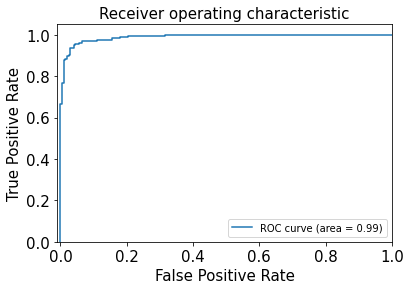

In [52]:
# draw ROC curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[...,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

auroc=roc_auc_score(y_test, y_pred[...,1])
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % auroc)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver operating characteristic', fontsize=15)
plt.legend(loc='lower right', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

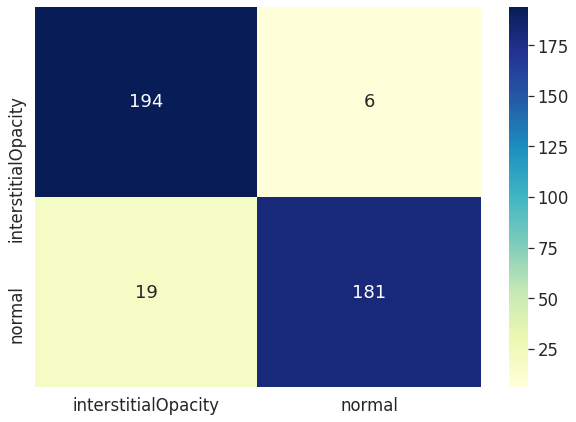

In [53]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_test, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
sn.set(font_scale=1.5)
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

### 딥러닝 결과를 이미지 차원에서 해석하기(feat. GradCAM)

![gradCAM](https://camo.githubusercontent.com/450498bd998fd99d51b647d2b6c8631e94585522/687474703a2f2f692e696d6775722e636f6d2f4a614762645a352e706e67)

**Grad-CAM: Why did you say that? Visual Explanations from Deep Networks via Gradient-based Localization**
Ramprasaath R. Selvaraju, Abhishek Das, Ramakrishna Vedantam, Michael Cogswell, Devi Parikh, Dhruv Batra
https://arxiv.org/abs/1610.02391

**Example: 'Boxer'**

![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog.png) 
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_gradcam.jpg)
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_guided_gradcam.jpg)

In [54]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (image_size, image_size))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

In [55]:
#class에 대응하는 index알아내기
print(test_generator.class_indices)
interstitialOpacity_idx=test_generator.class_indices.get("interstitialOpacity")
normal_idx=test_generator.class_indices.get("normal")

{'interstitialOpacity': 0, 'normal': 1}


0


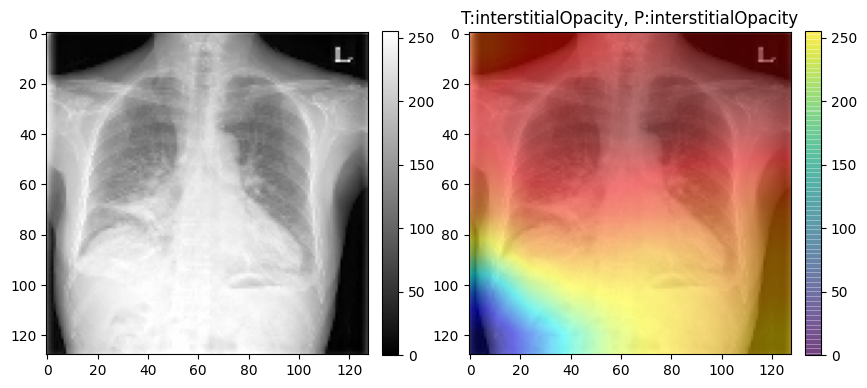

In [62]:
import tensorflow as tf

# Select a random query image+
testList=os.listdir(os.path.join(dataDir, 'interstitialOpacity'))
inum = np.random.randint(len(testList))
qimage=cv2.imread(os.path.join(dataDir, 'interstitialOpacity', testList[inum]))
qimage = cv2.resize(qimage, (image_size, image_size), interpolation = cv2.INTER_CUBIC)
ori_image = qimage.copy()

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, image_size, image_size, 3))
qimage  = qimage / 255.

idx = np.argmax(model.predict(qimage))
if idx == normal_idx:
  pred_title='normal'
else:
  pred_title='interstitialOpacity'

print(idx)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ori_image, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title('T:'+'interstitialOpacity'+', P:'+pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

1


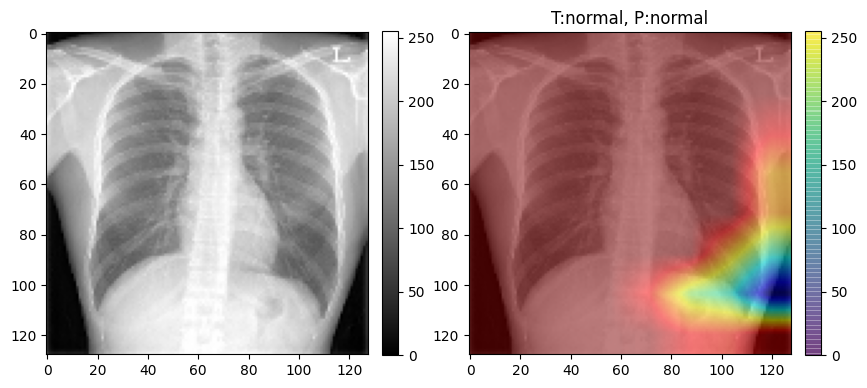

In [63]:
import tensorflow as tf

# Select a random query image+
testList=os.listdir(os.path.join(dataDir, 'normal'))
inum = np.random.randint(len(testList))
qimage=cv2.imread(os.path.join(dataDir, 'normal', testList[inum]))
qimage = cv2.resize(qimage, (image_size, image_size), interpolation = cv2.INTER_CUBIC)
ori_image = qimage.copy()

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, image_size, image_size, 3))
qimage  = qimage / 255.

idx = np.argmax(model.predict(qimage))
if idx == normal_idx:
  pred_title='normal'
else:
  pred_title='interstitialOpacity'

print(idx)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ori_image, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title('T:'+'normal'+', P:'+pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

### 2.4.6. 학습된 모델에 초기 weight를 적용하여 prediction해보기(학습된 weight 효과 실감)

In [58]:
from natsort import natsorted
weight_list=os.listdir(os.path.join(datapath, FOLDER, 'weights'))#저장한 weight리스트 만들기
weight_list_sorted=natsorted(weight_list)

In [59]:
#weight리스트 확인하기
print('number of weights:', len(weight_list_sorted))
for tmp in weight_list_sorted:
  print(tmp)

number of weights: 1
train_weights_epoch_005.h5


In [60]:
#weight불러오기
model.load_weights(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_005.h5'))

In [64]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
# For prediction purposes
y_pred = model.predict_generator(test_generator, steps=test_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

  1/400 [..............................] - ETA: 32s

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


400/400 [==============================] - 1s 3ms/step


### 2.4.7. Prediction 결과 분석하기

In [66]:
# get labels of test dataset
y_test = test_generator.labels

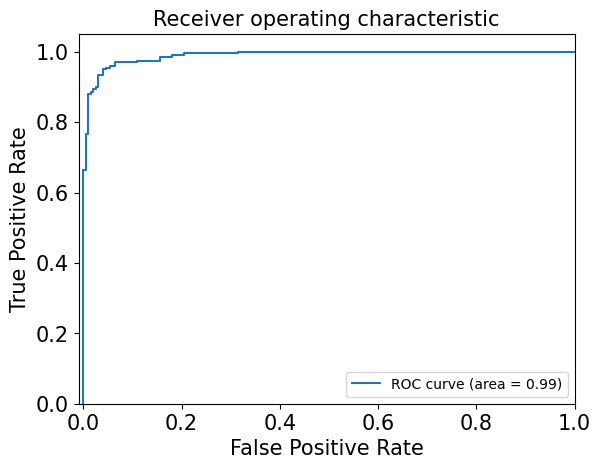

In [67]:
# draw ROC curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[...,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

auroc=roc_auc_score(y_test, y_pred[...,1])
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % auroc)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver operating characteristic', fontsize=15)
plt.legend(loc='lower right', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

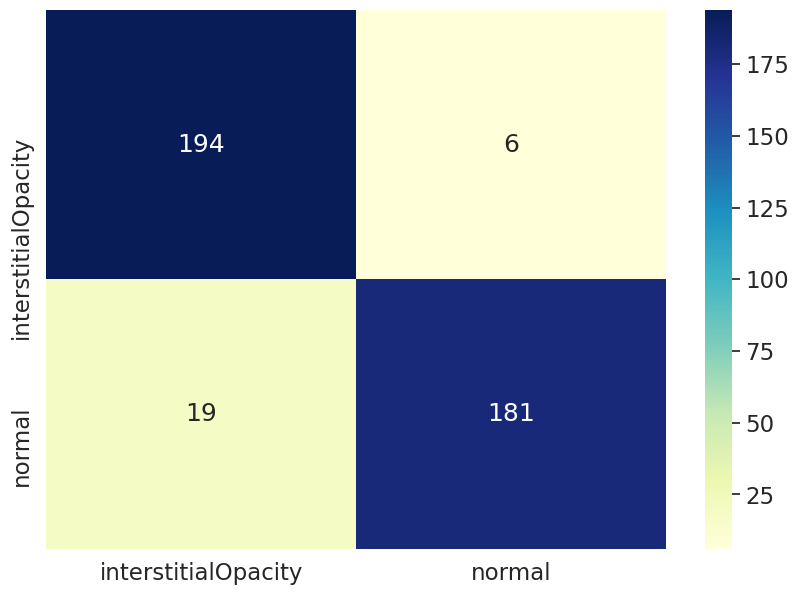

In [68]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_test, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
sn.set(font_scale=1.5)
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [69]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (image_size, image_size))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

In [70]:
#class에 대응하는 index알아내기
print(test_generator.class_indices)
interstitialOpacity_idx=test_generator.class_indices.get("interstitialOpacity")
normal_idx=test_generator.class_indices.get("normal")

{'interstitialOpacity': 0, 'normal': 1}


0


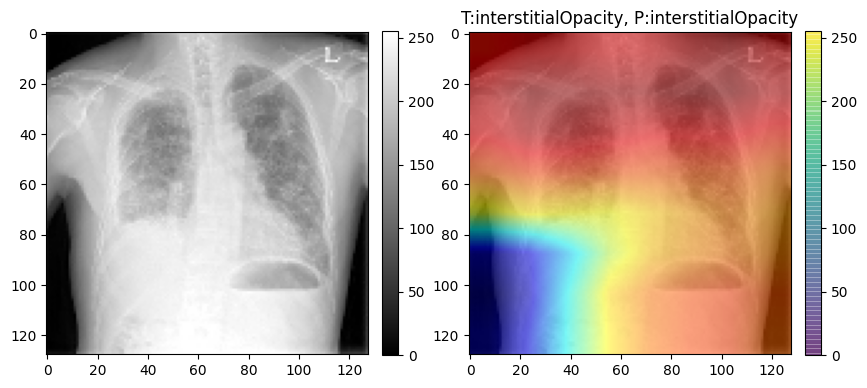

In [71]:
# Interstitial Opacity에 해당하는 이미지를 랜덤으로 불러와서 GradCAM 그려보기
import tensorflow as tf

# Select a random query image+
testList=os.listdir(os.path.join(dataDir, 'interstitialOpacity'))
inum = np.random.randint(len(testList))
qimage=cv2.imread(os.path.join(dataDir, 'interstitialOpacity', testList[inum]))
qimage = cv2.resize(qimage, (image_size, image_size), interpolation = cv2.INTER_CUBIC)
ori_image = qimage.copy()

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, image_size, image_size, 3))
qimage  = qimage / 255.

idx = np.argmax(model.predict(qimage))
if idx == normal_idx:
  pred_title='normal'
else:
  pred_title='interstitialOpacity'

print(idx)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ori_image, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title('T:'+'interstitialOpacity'+', P:'+pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

1


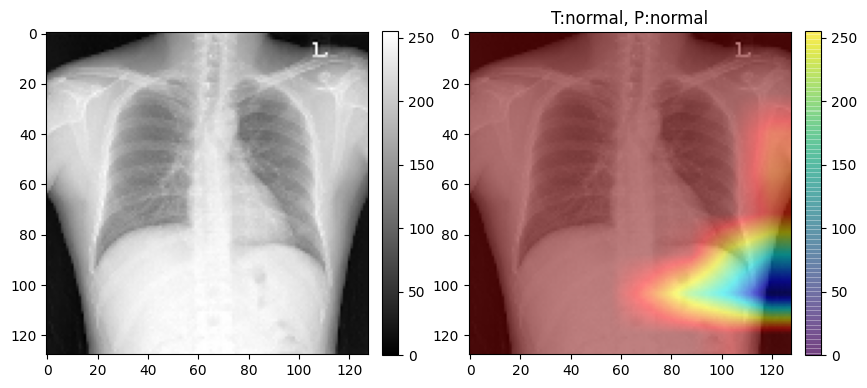

In [72]:
# normal에 해당하는 이미지를 랜덤으로 불러와서 GradCAM 그려보기

# Select a random query image+
testList=os.listdir(os.path.join(dataDir, 'normal'))
inum = np.random.randint(len(testList))
qimage=cv2.imread(os.path.join(dataDir, 'normal', testList[inum]))
qimage = cv2.resize(qimage, (image_size, image_size), interpolation = cv2.INTER_CUBIC)
ori_image = qimage.copy()

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, image_size, image_size, 3))
qimage  = qimage / 255.

idx = np.argmax(model.predict(qimage))
if idx == normal_idx:
  pred_title='normal'
else:
  pred_title='interstitialOpacity'

print(idx)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ori_image, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title('T:'+'normal'+', P:'+pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

# [3] DenseNet169를 이용한 분류 실습

### 3.1. DenseNet169 모델을 이용하여 학습하기

In [74]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras import regularizers, optimizers

from tensorflow.keras import layers

K.clear_session() # 새로운 세션으로 시작

K.image_data_format()

image_size = 128
batch_size = 32


from tensorflow import keras
from tensorflow.keras import layers

import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Concatenate

from tensorflow.keras.applications.densenet import DenseNet169

n_classes = 2
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape =(image_size,image_size,3))
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dropout(rate=0.3)(x)
x = keras.layers.Dense(300, activation='relu')(x)
x = keras.layers.Dropout(rate=0.5)(x)
x = keras.layers.Dense(100, activation='relu')(x)
output = keras.layers.Dense(n_classes, activation='sigmoid',name='final_layer')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

51888128/51877672 [==============================] - 4s 0us/step


In [75]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [76]:
!pip install livelossplot

In [78]:
from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

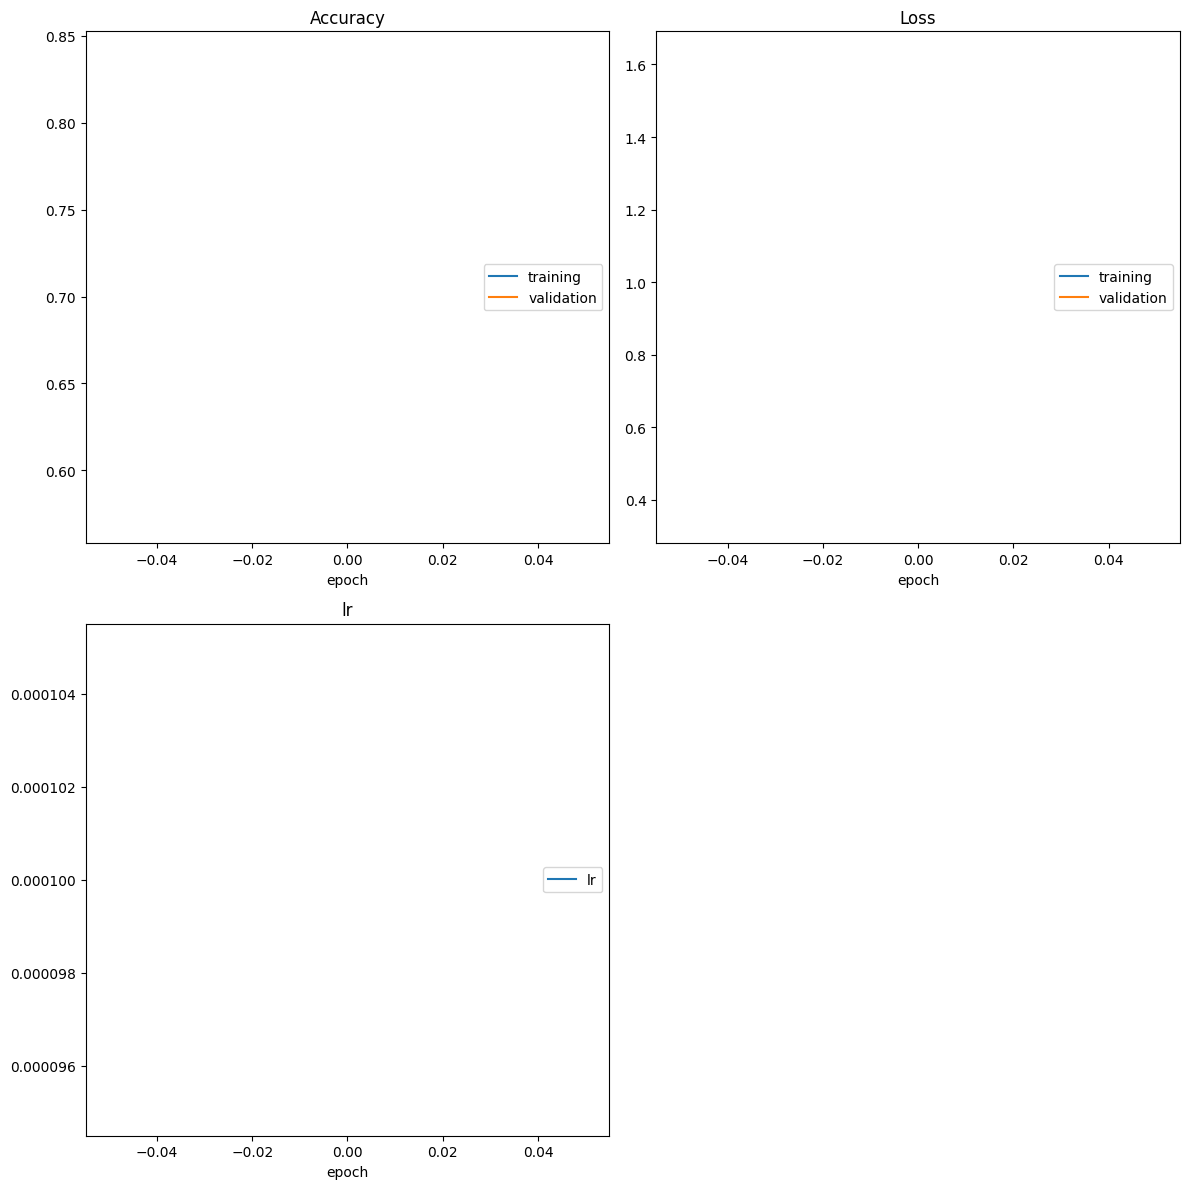

Accuracy
	training         	 (min:    0.839, max:    0.839, cur:    0.839)
	validation       	 (min:    0.571, max:    0.571, cur:    0.571)
Loss
	training         	 (min:    0.345, max:    0.345, cur:    0.345)
	validation       	 (min:    1.627, max:    1.627, cur:    1.627)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
Epoch 2/30
14/43 [========>.....................] - ETA: 12s - loss: 0.1242 - acc: 0.9554

KeyboardInterrupt: ignored

In [79]:
#import keras

datapath='./output'
FOLDER = 'study2'

epochs=30
save_period=5 #epoch

steps_per_epoch=(train_N*numClass)/batch_size
validation_steps=(valid_N*numClass)/batch_size

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                     save_weights_only=True, save_freq=int(save_period * steps_per_epoch))

hist = keras.callbacks.History()

csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch ,
      epochs=epochs,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=validation_steps,
      verbose=1)

### 3.2. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [ ]:
from natsort import natsorted
weight_list=os.listdir(os.path.join(datapath, FOLDER, 'weights'))#저장한 weight리스트 만들기
weight_list_sorted=natsorted(weight_list)#weight 리스트를 이름순으로 정렬하기

In [ ]:
#weight리스트 확인하기
print('number of weights:', len(weight_list_sorted))
for tmp in weight_list_sorted:
  print(tmp)

number of weights: 6
train_weights_epoch_005.h5
train_weights_epoch_010.h5
train_weights_epoch_015.h5
train_weights_epoch_020.h5
train_weights_epoch_025.h5
train_weights_epoch_030.h5


In [ ]:
#weight불러오기
model.load_weights(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_030.h5'))

In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# For prediction purposes
y_pred = model.predict_generator(test_generator, steps=test_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


400/400 [==============================] - 8s 13ms/step


### 3.3. Prediction 결과 분석하기

In [ ]:
# get labels of test dataset
y_test = test_generator.labels

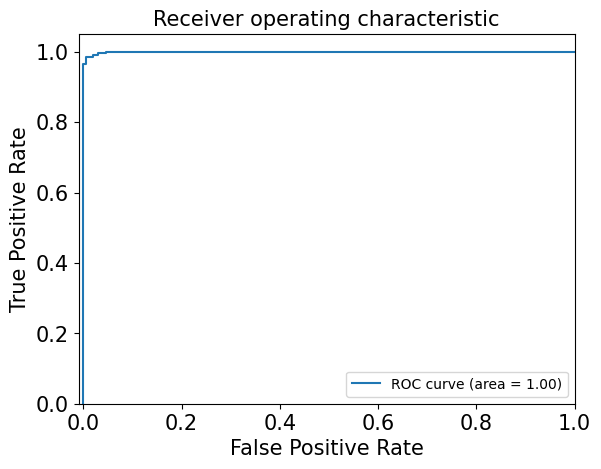

In [ ]:
# draw ROC curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[...,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

auroc=roc_auc_score(y_test, y_pred[...,1])
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % auroc)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver operating characteristic', fontsize=15)
plt.legend(loc='lower right', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

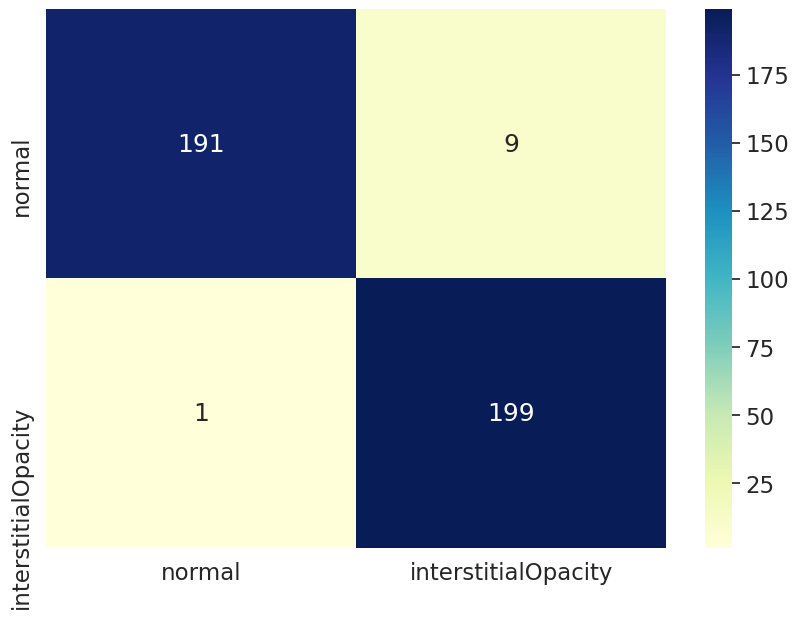

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_test, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
sn.set(font_scale=1.5)
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('conv5_block32_2_conv').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # DensetNet169의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # DensetNet169의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (image_size, image_size))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

In [ ]:
#class에 대응하는 index알아내기
print(test_generator.class_indices)
interstitialOpacity_idx=test_generator.class_indices.get("interstitialOpacity")
normal_idx=test_generator.class_indices.get("normal")

{'interstitialOpacity': 0, 'normal': 1}


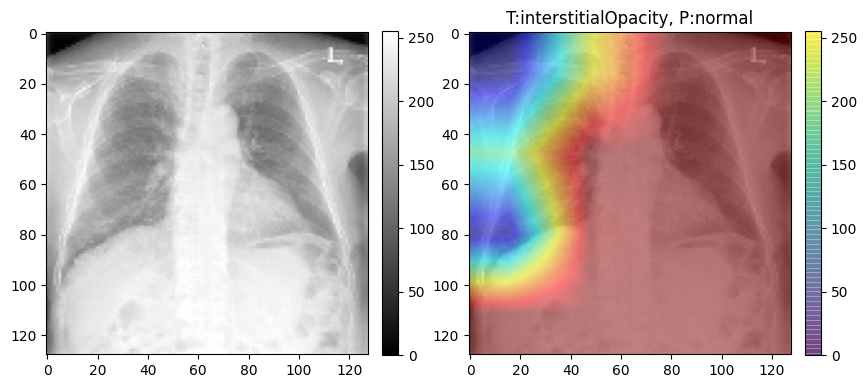

In [ ]:
import tensorflow as tf

# Select a random query image+
testList=os.listdir(os.path.join(dataDir, 'interstitialOpacity'))
inum = np.random.randint(len(testList))
qimage=cv2.imread(os.path.join(dataDir, 'interstitialOpacity', testList[inum]))
qimage = cv2.resize(qimage, (image_size, image_size), interpolation = cv2.INTER_CUBIC)
ori_image = qimage.copy()

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, image_size, image_size, 3))
qimage  = qimage / 255.

idx = np.argmax(model.predict(qimage))
if idx == normal_idx:
  pred_title='normal'
else:
  pred_title='interstitialOpacity'

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ori_image, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title('T:'+'interstitialOpacity'+', P:'+pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


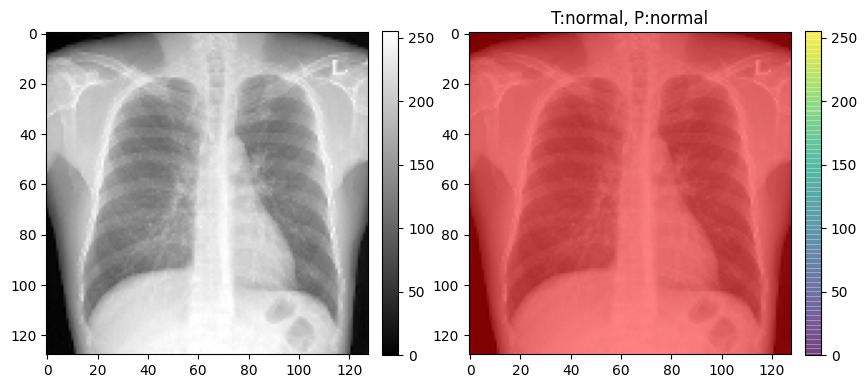

In [ ]:
# Select a random query image+
testList=os.listdir(os.path.join(dataDir, 'normal'))
inum = np.random.randint(len(testList))
qimage=cv2.imread(os.path.join(dataDir, 'normal', testList[inum]))
qimage = cv2.resize(qimage, (image_size, image_size), interpolation = cv2.INTER_CUBIC)
ori_image = qimage.copy()

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, image_size, image_size, 3))
qimage  = qimage / 255.

idx = np.argmax(model.predict(qimage))
if idx == normal_idx:
  pred_title='normal'
else:
  pred_title='interstitialOpacity'

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ori_image, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(122)
plt.title('T:'+'normal'+', P:'+pred_title)
plt.imshow(ori_image)
plt.imshow(cam, alpha=0.5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()